# Споредба на податоците од сентимент анализата

In [ ]:
import pandas as pd
import numpy as np
import csv
from google.colab import drive
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from IPython.display import display
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
from scipy.stats import spearmanr
from sklearn.metrics import accuracy_score, cohen_kappa_score, matthews_corrcoef

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## Процесирање на податоците

In [ ]:
cdf1 = pd.read_csv('/content/drive/MyDrive/DIPLOMSKA/GDELT/dataset1_cleaned.csv')
cdf2 = pd.read_csv('/content/drive/MyDrive/DIPLOMSKA/GDELT/dataset2_cleaned.csv')
cdf3 = pd.read_csv('/content/drive/MyDrive/DIPLOMSKA/GDELT/dataset3_cleaned.csv')
cdf4 = pd.read_csv('/content/drive/MyDrive/DIPLOMSKA/GDELT/dataset4_cleaned.csv')

In [ ]:
sdf1 = pd.read_csv('/content/drive/MyDrive/DIPLOMSKA/SENTIMENT/sentiment_datasetQ1.csv')
sdf2 = pd.read_csv('/content/drive/MyDrive/DIPLOMSKA/SENTIMENT/sentiment_datasetQ2.csv')
sdf3 = pd.read_csv('/content/drive/MyDrive/DIPLOMSKA/SENTIMENT/sentiment_datasetQ3.csv')
sdf4 = pd.read_csv('/content/drive/MyDrive/DIPLOMSKA/SENTIMENT/sentiment_datasetQ4.csv')

In [ ]:
concatenated_cdf = pd.concat([cdf1, cdf2, cdf3, cdf4], ignore_index=True)
concatenated_sdf = pd.concat([sdf1, sdf2, sdf3, sdf4], ignore_index=True)

In [ ]:
concatenated_cdf.to_csv('/content/drive/MyDrive/DIPLOMSKA/GDELT/concatenated_data_Cleaned.csv', index=False)
concatenated_sdf.to_csv('/content/drive/MyDrive/DIPLOMSKA/SENTIMENT/concatenated_data.csv', index=False)

In [ ]:
concatenated_sdf.head(10)

,URL,Title,Text,news_text,sentiment,Quarter
0,http://www.stripes.com/news/report-criminal-ch...,Report: Criminal charges dropped against offic...,A video posted on YouTube purports to show U.S...,['A video posted on YouTube purports to show U...,negative,Q1
1,http://www.pbs.org/newshour/rundown/army-gener...,"Army general expected to enter plea bargain, N...",An Army general has reportedly agreed to enter...,['An Army general has reportedly agreed to ent...,negative,Q1
2,http://www.khaama.com/suicide-attack-organizer...,Suicide attack organizers blown up by own expl...,A group of suspected suicide attack organizers...,['A group of suspected suicide attack organize...,negative,Q1
3,http://www.jobsnhire.com/articles/6180/2013101...,BREAKING: Microphone Bomb Kills Afghan Gov. Du...,A microphone bomb killed an Afghanistan provin...,['A microphone bomb killed an Afghanistan prov...,neutral,Q1
4,http://www.washingtonpost.com/world/asia_pacif...,Here’s what it means to be Afghanistan’s ‘most...,The veteran traffic policeman walked to the st...,['the veteran traffic policeman walked to the ...,neutral,Q1
5,http://www.independent.co.uk/news/world/europe...,David Cameron defends controversial Kazakhstan...,For free real time breaking news alerts sent s...,['for free real time breaking news alerts sent...,neutral,Q1
6,http://tribune.com.pk/story/668772/peace-talks...,Peace talks with TTP will probably fail: Imran...,In an interview with the New York-based news w...,['In an interview with the New York-based news...,negative,Q1
7,http://www.huffingtonpost.com/2013/08/05/westb...,Westboro Baptist Church Counter-Protested At S...,The next four years will change America foreve...,"[""The next four years will change America fore...",neutral,Q1
8,http://www.economist.com/blogs/banyan/2013/09/...,Shaking hands only,Violence on the border is the worst it has bee...,['Violence on the border is the worst it has b...,negative,Q1
9,http://news.yahoo.com/soldier-charged-afghan-k...,"Yahoo News: Latest and Breaking News, Headline...",Style · The Daily Beast\n\nScouted selects pro...,['Style · The Daily Beast\n\nScouted selects p...,neutral,Q1


In [ ]:
concatenated_cdf.head(10)

,GlobalEventID,EventCode,GoldsteinScale,AvgTone,ActionGeo_CountryCode,SOURCEURL
0,1029155021,203,-10.0,-2.275449,US,https://www.theguardian.com/commentisfree/2022...
1,1029216530,144,-7.5,-2.345416,US,https://wusfnews.wusf.usf.edu/weather/2022-02-...
2,1029161417,203,-10.0,1.091703,US,https://news.yahoo.com/word-smokies-african-am...
3,1029134955,144,-7.5,-1.403888,US,https://www.lajollalight.com/news/story/2022-0...
4,1029214924,202,-10.0,-0.436047,US,https://bwog.com/2022/02/beyond-batman-and-bla...
5,1029206657,1411,-6.5,-4.545455,US,http://twocircles.net/2022feb19/445112.html
6,1029126794,144,-7.5,-11.178248,US,https://www.kcra.com/article/interstate-80-wes...
7,1029229138,144,-7.5,-2.545455,US,https://www.msn.com/en-us/news/politics/minnes...
8,1028009756,144,-7.5,-7.077425,US,https://www.postbulletin.com/news/world/canada...
9,1028018005,144,-7.5,-6.645845,US,https://pmnewsnigeria.com/2022/02/12/protester...


In [ ]:
concatenated_sdf.rename(columns={'URL': 'SOURCEURL'}, inplace=True)

In [ ]:
merged_df = concatenated_cdf.merge(concatenated_sdf, on="SOURCEURL")

In [ ]:
merged_df

,GlobalEventID,EventCode,GoldsteinScale,AvgTone,ActionGeo_CountryCode,SOURCEURL,Title,Text,news_text,sentiment,Quarter
0,1025896134,202,-10.0,-1.547988,US,https://thebuzz.iheart.com/featured/the-rod-ry...,Music: Corey Taylor Is Still Fighting With Mac...,Corey Taylor Is Still Fighting With Machine Gu...,['Corey Taylor Is Still Fighting With Machine ...,neutral,Q1
1,1035544763,203,-10.0,-3.962264,US,https://www.theepochtimes.com/former-us-secret...,Former US Secretary of State Madeleine Albrigh...,Madeleine Albright is seen speaking at the 201...,['madeleine albright is seen speaking at the 2...,negative,Q1
2,1036676620,201,-9.5,-1.910220,US,https://www.latimes.com/business/story/2022-03...,A Commerce Department investigation could impe...,Clean energy leaders said a Commerce Departmen...,['clean energy leaders said a commerce departm...,negative,Q1
3,1029138470,141,-6.5,-1.172708,US,https://www.nancyonnorwalk.com/as-ct-seeks-to-...,"As CT seeks to desegregate schools, suburban d...",Five-year-old Darien kindergarten student Vivi...,['five - year - old darien kindergarten studen...,negative,Q1
4,1021783124,141,-6.5,-0.458716,US,https://www.azosensors.com/article.aspx?Articl...,The Use of Pressure Sensors in Sleep Apnea Dev...,Sleep apnea is a potentially serious sleep dis...,['sleep apnea is a potentially serious sleep d...,positive,Q1
...,...,...,...,...,...,...,...,...,...,...,...
2640,1145852090,190,-10.0,-1.068616,US,https://www.dailymail.co.uk/tvshowbiz/article-...,Mama June gets custody of one of late daughter...,Mama June Shannon has gained custody for one o...,"[""mama june shannon has gained custody for one...",neutral,Q4
2641,1143331079,190,-10.0,-1.386749,US,https://www.wvtf.org/news/2023-11-29/suit-agai...,Suit against insulin manufacturers spurs healt...,Three Virginia localities have filed federal l...,"[""three virginia localities have filed federal...",neutral,Q4
2642,1145088592,190,-10.0,-8.460237,US,https://www.latimes.com/world-nation/story/202...,Journalists’ rights group counts 94 media work...,Journalists observe as a Palestinian man wound...,['journalists observe as a palestinian man wou...,negative,Q4
2643,1066953928,195,-10.0,-5.044993,US,https://www.abc15.com/news/national/authoritie...,Authorities investigating after some US airpor...,The websites for some major U.S. airports went...,['The websites for some major U.S. airports we...,negative,Q4


## Анализа

### Метрики

In [ ]:
def map_avg_tone_to_sentiment(avg_tone):
    if avg_tone > 5:
        return "positive"
    elif avg_tone < -5:
        return "negative"
    else:
        return "neutral"

merged_df["predicted_sentiment"] = merged_df["AvgTone"].apply(map_avg_tone_to_sentiment)

true_sentiment = merged_df["sentiment"].values
predicted_sentiment = merged_df["predicted_sentiment"].values

accuracy = accuracy_score(true_sentiment, predicted_sentiment)
conf_matrix = confusion_matrix(true_sentiment, predicted_sentiment, labels=["positive", "neutral", "negative"])
classification_rep = classification_report(true_sentiment, predicted_sentiment)
kappa_score = cohen_kappa_score(true_sentiment, predicted_sentiment)
mcc_score = matthews_corrcoef(true_sentiment, predicted_sentiment)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)
print(f"Cohen's Kappa: {kappa_score:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc_score:.4f}")

Accuracy: 0.6544

Confusion Matrix:
 [[   3   30    5]
 [  15 1032  334]
 [   0  527  696]]

Classification Report:
               precision    recall  f1-score   support

       ERROR       0.00      0.00      0.00         3
    negative       0.67      0.57      0.62      1223
     neutral       0.65      0.75      0.69      1381
    positive       0.17      0.08      0.11        38

    accuracy                           0.65      2645
   macro avg       0.37      0.35      0.35      2645
weighted avg       0.65      0.65      0.65      2645

Cohen's Kappa: 0.3154
Matthews Correlation Coefficient (MCC): 0.3191


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


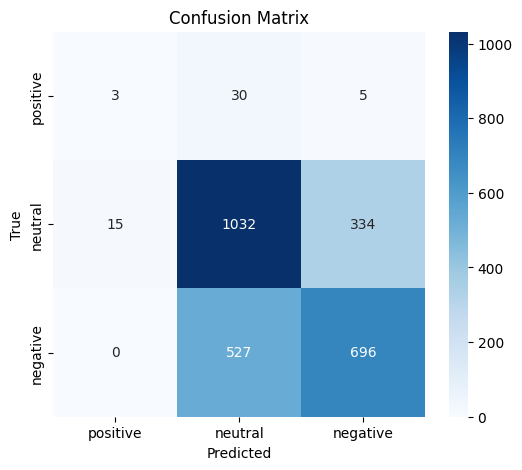

In [ ]:
conf_matrix = confusion_matrix(true_sentiment, predicted_sentiment, labels=["positive", "neutral", "negative"])

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["positive", "neutral", "negative"], yticklabels=["positive", "neutral", "negative"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


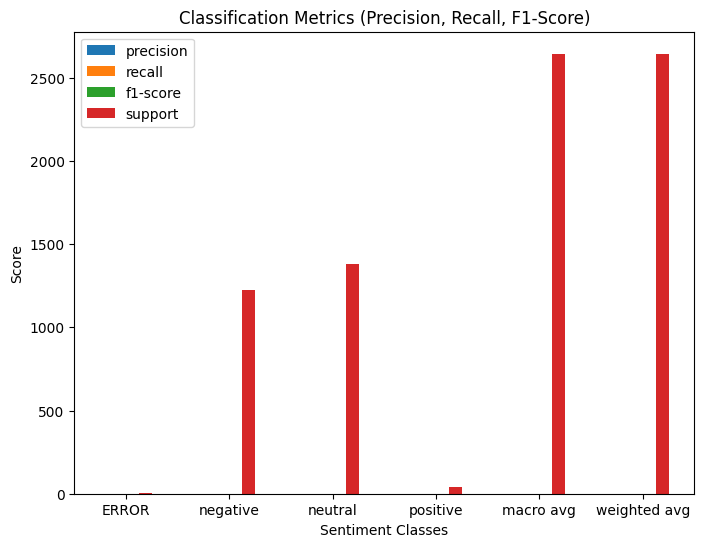

In [ ]:
report = classification_report(true_sentiment, predicted_sentiment, output_dict=True)

report_df = pd.DataFrame(report).transpose()

report_df.drop("accuracy", axis=0, inplace=True)
report_df.plot(kind="bar", figsize=(8, 6))
plt.title("Classification Metrics (Precision, Recall, F1-Score)")
plt.ylabel("Score")
plt.xlabel("Sentiment Classes")
plt.xticks(rotation=0)
plt.show()

### Приказ на распределбата на вистински и предвидени сентименти

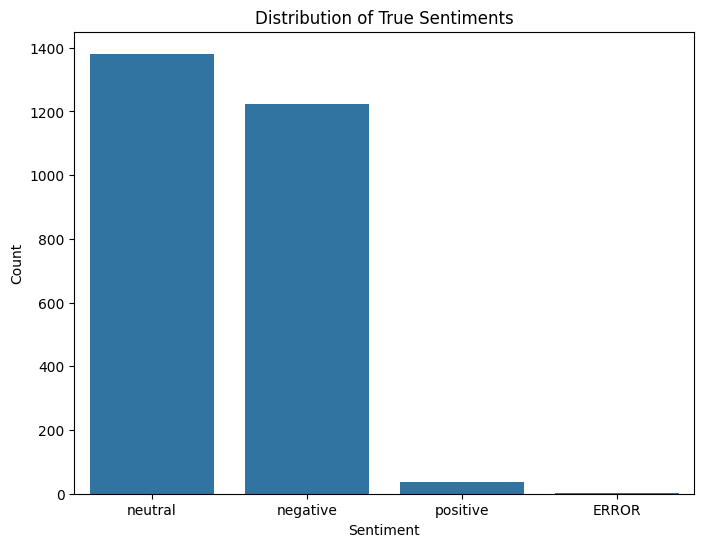

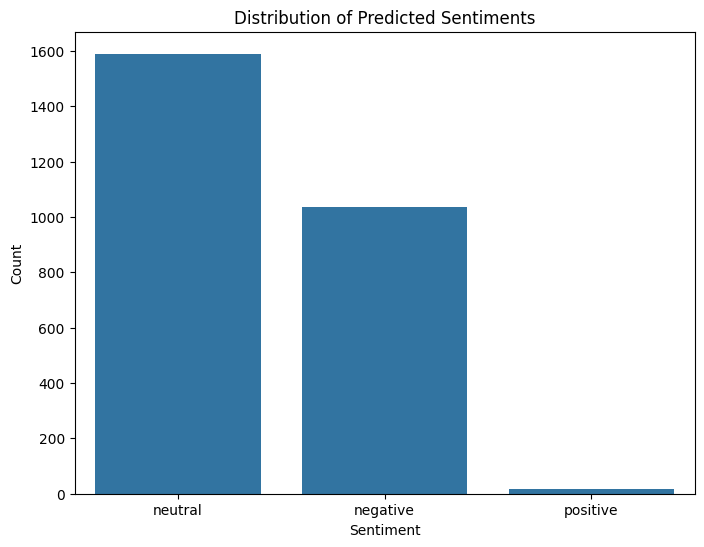

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=true_sentiment)
plt.title("Distribution of True Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x=predicted_sentiment)
plt.title("Distribution of Predicted Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

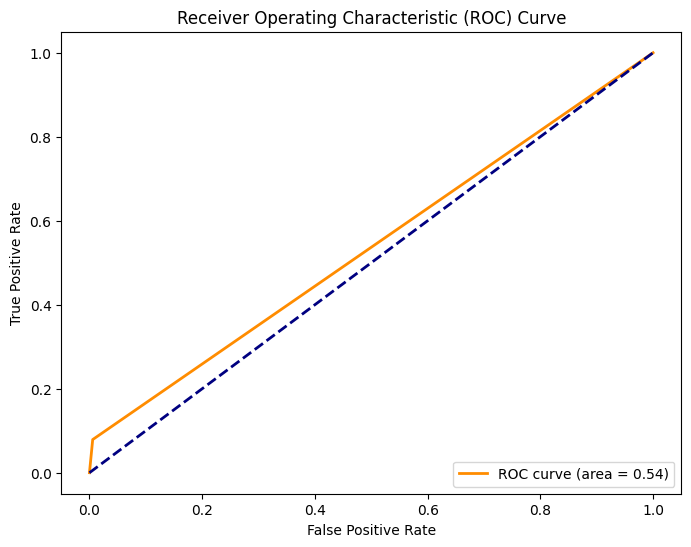

In [ ]:
binary_true_sentiment = [1 if sentiment == "positive" else 0 for sentiment in true_sentiment]
binary_predicted_sentiment = [1 if sentiment == "positive" else 0 for sentiment in predicted_sentiment]

fpr, tpr, thresholds = roc_curve(binary_true_sentiment, binary_predicted_sentiment)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

### Хистограм за приказ на распределбата на AvgTone

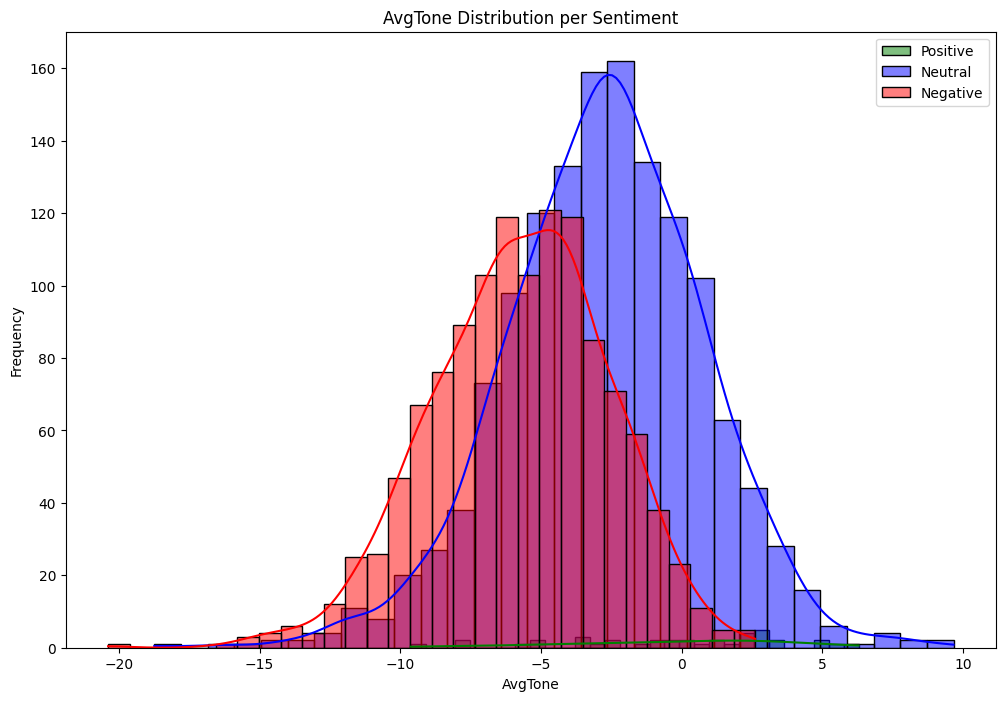

In [ ]:
plt.figure(figsize=(12, 8))

sns.histplot(data=merged_df[merged_df['sentiment'] == 'positive'], x='AvgTone', kde=True, color='green', label='Positive', bins=30)
sns.histplot(data=merged_df[merged_df['sentiment'] == 'neutral'], x='AvgTone', kde=True, color='blue', label='Neutral', bins=30)
sns.histplot(data=merged_df[merged_df['sentiment'] == 'negative'], x='AvgTone', kde=True, color='red', label='Negative', bins=30)

plt.title('AvgTone Distribution per Sentiment')
plt.xlabel('AvgTone')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Нормализирана конфузиона матрица

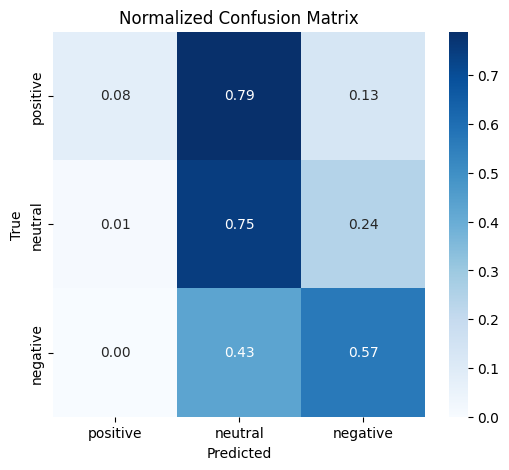

In [ ]:
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=["positive", "neutral", "negative"], yticklabels=["positive", "neutral", "negative"])
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### ROC крива

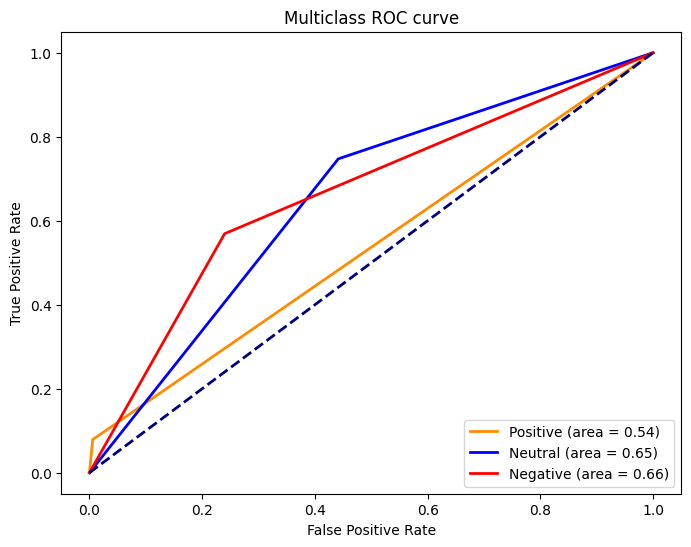

In [ ]:
y_true_binarized = label_binarize(true_sentiment, classes=["positive", "neutral", "negative"])
y_pred_binarized = label_binarize(predicted_sentiment, classes=["positive", "neutral", "negative"])

fpr, tpr, _ = roc_curve(y_true_binarized[:, 0], y_pred_binarized[:, 0])
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"Positive (area = {roc_auc:.2f})")
fpr, tpr, _ = roc_curve(y_true_binarized[:, 1], y_pred_binarized[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', lw=2, label=f"Neutral (area = {roc_auc:.2f})")
fpr, tpr, _ = roc_curve(y_true_binarized[:, 2], y_pred_binarized[:, 2])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='red', lw=2, label=f"Negative (area = {roc_auc:.2f})")


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

### Precision-Recall крива

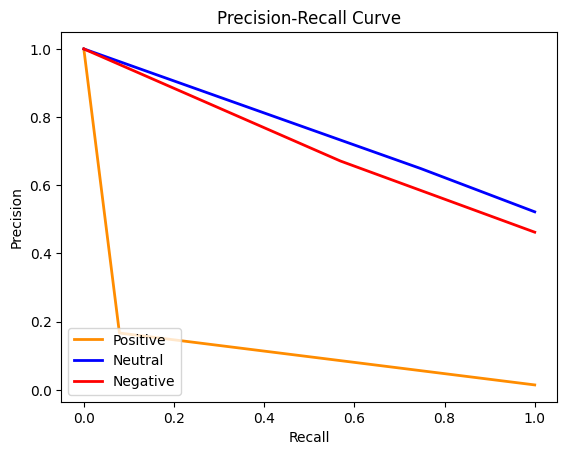

In [ ]:
precision, recall, _ = precision_recall_curve(y_true_binarized[:, 0], y_pred_binarized[:, 0])
plt.plot(recall, precision, color='darkorange', lw=2, label="Positive")

precision, recall, _ = precision_recall_curve(y_true_binarized[:, 1], y_pred_binarized[:, 1])
plt.plot(recall, precision, color='blue', lw=2, label="Neutral")

precision, recall, _ = precision_recall_curve(y_true_binarized[:, 2], y_pred_binarized[:, 2])
plt.plot(recall, precision, color='red', lw=2, label="Negative")

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left")
plt.show()

### Spearman correlation

In [ ]:
x = merged_df['AvgTone']
y = merged_df['sentiment']

correlation, p_value = spearmanr(x, y)

print(f"Spearman correlation: {correlation}")
print(f"P-value: {p_value}")

Spearman correlation: 0.4292123149328861
P-value: 5.000178280690737e-119


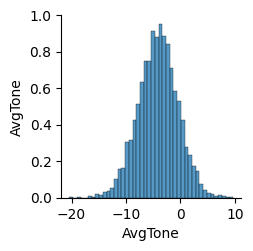

In [ ]:
sns.pairplot(merged_df[['AvgTone', 'sentiment']])
plt.show()

### Scatter plot за визуализирање на односот

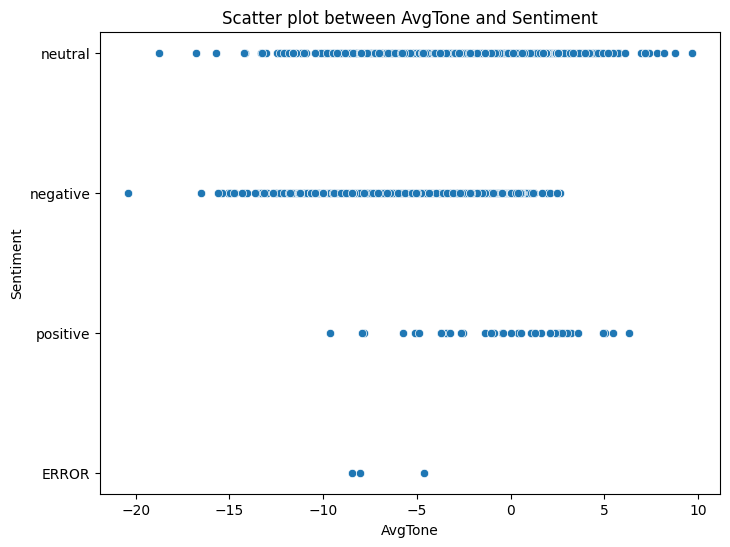

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=merged_df['AvgTone'], y=merged_df['sentiment'])

plt.title('Scatter plot between AvgTone and Sentiment')
plt.xlabel('AvgTone')
plt.ylabel('Sentiment')

plt.show()